In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# loading dataset
data = pd.read_csv('sonar.csv',header=None)
data.shape

(208, 61)

In [5]:
#Shuffling Data
shuffled_data = data.sample(frac=1)
shuffled_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
41,0.0093,0.0185,0.0056,0.0064,0.0260,0.0458,0.0470,0.0057,0.0425,0.0640,...,0.0069,0.0064,0.0129,0.0114,0.0054,0.0089,0.0050,0.0058,0.0025,R
138,0.0731,0.1249,0.1665,0.1496,0.1443,0.2770,0.2555,0.1712,0.0466,0.1114,...,0.0444,0.0230,0.0290,0.0141,0.0161,0.0177,0.0194,0.0207,0.0057,M
124,0.0388,0.0324,0.0688,0.0898,0.1267,0.1515,0.2134,0.2613,0.2832,0.2718,...,0.0255,0.0071,0.0263,0.0079,0.0111,0.0107,0.0068,0.0097,0.0067,M
169,0.0130,0.0120,0.0436,0.0624,0.0428,0.0349,0.0384,0.0446,0.1318,0.1375,...,0.0084,0.0100,0.0018,0.0035,0.0058,0.0011,0.0009,0.0033,0.0026,M
20,0.0473,0.0509,0.0819,0.1252,0.1783,0.3070,0.3008,0.2362,0.3830,0.3759,...,0.0193,0.0118,0.0064,0.0042,0.0054,0.0049,0.0082,0.0028,0.0027,R


In [7]:
#Setting a random see for randomness of datain get getter
#results
seed = 7
np.random.seed(seed)
dataset = shuffled_data.values
dataset

array([[0.0093, 0.0185, 0.0056, ..., 0.0058, 0.0025, 'R'],
       [0.0731, 0.1249, 0.1665, ..., 0.0207, 0.0057, 'M'],
       [0.0388, 0.0324, 0.0688, ..., 0.0097, 0.0067, 'M'],
       ...,
       [0.0269, 0.0383, 0.0505, ..., 0.0055, 0.0057, 'M'],
       [0.0036, 0.0078, 0.0092, ..., 0.0024, 0.0016, 'R'],
       [0.0336, 0.0294, 0.0476, ..., 0.0069, 0.0051, 'R']], dtype=object)

In [17]:
#Splitting Data into Input(X) and output(Y) labels
#Training Split
train_X = dataset[:144,:60].astype('float')
train_Y = dataset[:144,60]
train_X.shape

(144, 60)

In [18]:
#Test Split
test_X = dataset[144:185,:60].astype('float')
test_Y = dataset[144:185,60]
test_X.shape

(41, 60)

In [19]:
#Validation Split
val_X = dataset[185:,:60].astype('float')
val_Y = dataset[185:,60]
val_X.shape

(23, 60)

In [20]:
#Perparing Data // Encoding Labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encY_train = le.fit_transform(train_Y)
encY_test  = le.fit_transform(test_Y)
encY_val   = le.fit_transform(val_Y)

In [23]:
display(encY_train.shape)
display(encY_test.shape)
display(encY_val.shape)

(144,)

(41,)

(23,)

In [25]:
#  Making First Model and Analyzing the results without validation
def base_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(60,)),
        tf.keras.layers.Dense(30, activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
    ])
    #  Compile the Model
    sgd = tf.keras.optimizers.SGD(lr=0.01,momentum=0.8, decay=0.0,nesterov=False)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [27]:
model = base_model()
model.fit(train_X, encY_train, epochs=100, batch_size=14)

Train on 144 samples
Epoch 1/100
144/144 [==============================] - 1s 5ms/sample - loss: 0.6990 - accuracy: 0.4583
Epoch 2/100
144/144 [==============================] - 0s 167us/sample - loss: 0.6878 - accuracy: 0.5556
Epoch 3/100
144/144 [==============================] - 0s 187us/sample - loss: 0.6797 - accuracy: 0.5972
Epoch 4/100
144/144 [==============================] - 0s 208us/sample - loss: 0.6748 - accuracy: 0.6181
Epoch 5/100
144/144 [==============================] - 0s 243us/sample - loss: 0.6675 - accuracy: 0.6250
Epoch 6/100
144/144 [==============================] - 0s 291us/sample - loss: 0.6614 - accuracy: 0.6528
Epoch 7/100
144/144 [==============================] - 0s 264us/sample - loss: 0.6635 - accuracy: 0.5833
Epoch 8/100
144/144 [==============================] - 0s 166us/sample - loss: 0.6508 - accuracy: 0.6458
Epoch 9/100
144/144 [==============================] - 0s 215us/sample - loss: 0.6513 - accuracy: 0.6597
Epoch 10/100
144/144 [==============

144/144 [==============================] - 0s 215us/sample - loss: 0.4092 - accuracy: 0.7847
Epoch 79/100
144/144 [==============================] - 0s 215us/sample - loss: 0.4016 - accuracy: 0.8194
Epoch 80/100
144/144 [==============================] - 0s 194us/sample - loss: 0.4011 - accuracy: 0.8125
Epoch 81/100
144/144 [==============================] - 0s 243us/sample - loss: 0.3975 - accuracy: 0.8194
Epoch 82/100
144/144 [==============================] - 0s 167us/sample - loss: 0.3959 - accuracy: 0.8125
Epoch 83/100
144/144 [==============================] - 0s 180us/sample - loss: 0.4068 - accuracy: 0.8333
Epoch 84/100
144/144 [==============================] - 0s 187us/sample - loss: 0.3964 - accuracy: 0.8264
Epoch 85/100
144/144 [==============================] - 0s 194us/sample - loss: 0.4022 - accuracy: 0.8125
Epoch 86/100
144/144 [==============================] - 0s 180us/sample - loss: 0.4174 - accuracy: 0.7917
Epoch 87/100
144/144 [==============================] - 0s 

In [28]:
#Prediction
results = model.evaluate(test_X, encY_test, verbose=2)

41/41 - 0s - loss: 0.3777 - accuracy: 0.8293


# Fitting Model with Validation

In [29]:
model1= base_model()
history = model1.fit(train_X, encY_train, epochs=200, batch_size=16, validation_data=(val_X, encY_val))


Train on 144 samples, validate on 23 samples
Epoch 1/200
144/144 [==============================] - 0s 3ms/sample - loss: 0.6814 - accuracy: 0.5417 - val_loss: 0.6665 - val_accuracy: 0.4348
Epoch 2/200
144/144 [==============================] - 0s 236us/sample - loss: 0.6757 - accuracy: 0.5278 - val_loss: 0.6536 - val_accuracy: 0.6087
Epoch 3/200
144/144 [==============================] - 0s 236us/sample - loss: 0.6652 - accuracy: 0.6528 - val_loss: 0.6354 - val_accuracy: 0.6957
Epoch 4/200
144/144 [==============================] - 0s 243us/sample - loss: 0.6554 - accuracy: 0.6667 - val_loss: 0.6257 - val_accuracy: 0.6522
Epoch 5/200
144/144 [==============================] - 0s 215us/sample - loss: 0.6485 - accuracy: 0.7083 - val_loss: 0.6132 - val_accuracy: 0.7391
Epoch 6/200
144/144 [==============================] - 0s 236us/sample - loss: 0.6422 - accuracy: 0.6667 - val_loss: 0.6090 - val_accuracy: 0.6522
Epoch 7/200
144/144 [==============================] - 0s 243us/sample - lo

144/144 [==============================] - 0s 208us/sample - loss: 0.4578 - accuracy: 0.7847 - val_loss: 0.3520 - val_accuracy: 0.9130
Epoch 57/200
144/144 [==============================] - 0s 250us/sample - loss: 0.4582 - accuracy: 0.7986 - val_loss: 0.3573 - val_accuracy: 0.9130
Epoch 58/200
144/144 [==============================] - 0s 215us/sample - loss: 0.4543 - accuracy: 0.7847 - val_loss: 0.3559 - val_accuracy: 0.9130
Epoch 59/200
144/144 [==============================] - 0s 222us/sample - loss: 0.4549 - accuracy: 0.7708 - val_loss: 0.3477 - val_accuracy: 0.9130
Epoch 60/200
144/144 [==============================] - 0s 215us/sample - loss: 0.4544 - accuracy: 0.8264 - val_loss: 0.3468 - val_accuracy: 0.9130
Epoch 61/200
144/144 [==============================] - 0s 215us/sample - loss: 0.4533 - accuracy: 0.7639 - val_loss: 0.3552 - val_accuracy: 0.9130
Epoch 62/200
144/144 [==============================] - 0s 229us/sample - loss: 0.4563 - accuracy: 0.7986 - val_loss: 0.3482 

144/144 [==============================] - 0s 292us/sample - loss: 0.3635 - accuracy: 0.8542 - val_loss: 0.2969 - val_accuracy: 0.8696
Epoch 112/200
144/144 [==============================] - 0s 257us/sample - loss: 0.3630 - accuracy: 0.8611 - val_loss: 0.2971 - val_accuracy: 0.8696
Epoch 113/200
144/144 [==============================] - 0s 215us/sample - loss: 0.3675 - accuracy: 0.8264 - val_loss: 0.2903 - val_accuracy: 0.9130
Epoch 114/200
144/144 [==============================] - 0s 236us/sample - loss: 0.3616 - accuracy: 0.8750 - val_loss: 0.2988 - val_accuracy: 0.8696
Epoch 115/200
144/144 [==============================] - 0s 257us/sample - loss: 0.3574 - accuracy: 0.8333 - val_loss: 0.2915 - val_accuracy: 0.9130
Epoch 116/200
144/144 [==============================] - 0s 250us/sample - loss: 0.3692 - accuracy: 0.8333 - val_loss: 0.3093 - val_accuracy: 0.8696
Epoch 117/200
144/144 [==============================] - 0s 229us/sample - loss: 0.3598 - accuracy: 0.8542 - val_loss: 0

144/144 [==============================] - 0s 236us/sample - loss: 0.2888 - accuracy: 0.9236 - val_loss: 0.2672 - val_accuracy: 0.9130
Epoch 167/200
144/144 [==============================] - 0s 250us/sample - loss: 0.3155 - accuracy: 0.8472 - val_loss: 0.2849 - val_accuracy: 0.8696
Epoch 168/200
144/144 [==============================] - 0s 257us/sample - loss: 0.2897 - accuracy: 0.9236 - val_loss: 0.2682 - val_accuracy: 0.9130
Epoch 169/200
144/144 [==============================] - 0s 243us/sample - loss: 0.2849 - accuracy: 0.9306 - val_loss: 0.2686 - val_accuracy: 0.9130
Epoch 170/200
144/144 [==============================] - 0s 229us/sample - loss: 0.2951 - accuracy: 0.9028 - val_loss: 0.2650 - val_accuracy: 0.9130
Epoch 171/200
144/144 [==============================] - 0s 236us/sample - loss: 0.3027 - accuracy: 0.9028 - val_loss: 0.2792 - val_accuracy: 0.8696
Epoch 172/200
144/144 [==============================] - 0s 243us/sample - loss: 0.2885 - accuracy: 0.9375 - val_loss: 0

In [31]:
#Testing out model
model1.evaluate(test_X, encY_test)

41/41 [==============================] - 0s 146us/sample - loss: 0.3475 - accuracy: 0.8780


[0.3474617600440979, 0.8780488]

In [34]:
import matplotlib.pyplot as plt
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

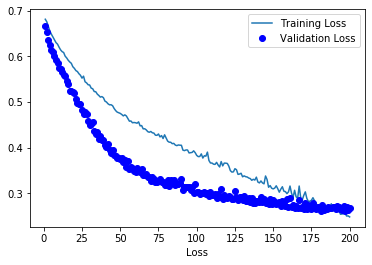

In [35]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs= range(1, len(loss)+1)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, 'bo', label='Validation Loss')
plt.xlabel('Epochs')
plt.xlabel('Loss')
plt.legend()
plt.show()

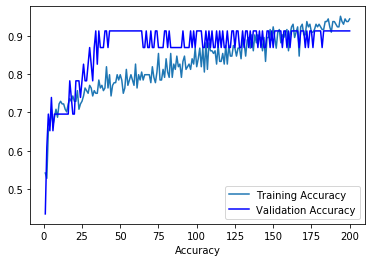

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs= range(1, len(loss)+1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.xlabel('Accuracy')
plt.legend()
plt.show()

# K-Fold

In [40]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline

In [42]:
from sklearn.model_selection import KFold
kf=10
for train_index,test_index in KFold(kf).split(train_X):
#     x_train,x_test=X[train_index],X[test_index]
#     y_train,y_test=Y[train_index],Y[test_index]
    model=base_model()
    model.fit(train_X,encY_train,epochs=20)
    print('Model evaluation',model.evaluate(test_X, encY_test))

Train on 144 samples
Epoch 1/20
144/144 [==============================] - 0s 3ms/sample - loss: 0.7031 - accuracy: 0.5139
Epoch 2/20
144/144 [==============================] - 0s 118us/sample - loss: 0.6979 - accuracy: 0.5208
Epoch 3/20
144/144 [==============================] - 0s 132us/sample - loss: 0.6915 - accuracy: 0.5278
Epoch 4/20
144/144 [==============================] - 0s 146us/sample - loss: 0.6860 - accuracy: 0.5764
Epoch 5/20
144/144 [==============================] - 0s 118us/sample - loss: 0.6802 - accuracy: 0.5694
Epoch 6/20
144/144 [==============================] - 0s 125us/sample - loss: 0.6740 - accuracy: 0.5694
Epoch 7/20
144/144 [==============================] - 0s 118us/sample - loss: 0.6690 - accuracy: 0.5556
Epoch 8/20
144/144 [==============================] - 0s 125us/sample - loss: 0.6628 - accuracy: 0.5903
Epoch 9/20
144/144 [==============================] - 0s 139us/sample - loss: 0.6572 - accuracy: 0.6181
Epoch 10/20
144/144 [========================

144/144 [==============================] - 0s 125us/sample - loss: 0.6495 - accuracy: 0.6042
Epoch 15/20
144/144 [==============================] - 0s 132us/sample - loss: 0.6431 - accuracy: 0.6319
Epoch 16/20
144/144 [==============================] - 0s 125us/sample - loss: 0.6402 - accuracy: 0.6736
Epoch 17/20
144/144 [==============================] - 0s 132us/sample - loss: 0.6389 - accuracy: 0.7292
Epoch 18/20
144/144 [==============================] - 0s 118us/sample - loss: 0.6340 - accuracy: 0.7222
Epoch 19/20
144/144 [==============================] - 0s 132us/sample - loss: 0.6311 - accuracy: 0.7153
Epoch 20/20
41/41 [==============================] - 0s 2ms/sample - loss: 0.6253 - accuracy: 0.7073
Model evaluation [0.6252531162122401, 0.70731705]
Train on 144 samples
Epoch 1/20
144/144 [==============================] - 0s 3ms/sample - loss: 0.7171 - accuracy: 0.4514
Epoch 2/20
144/144 [==============================] - 0s 111us/sample - loss: 0.7035 - accuracy: 0.4792
Epoc

144/144 [==============================] - 0s 146us/sample - loss: 0.6695 - accuracy: 0.5556
Epoch 7/20
144/144 [==============================] - 0s 173us/sample - loss: 0.6670 - accuracy: 0.5694
Epoch 8/20
144/144 [==============================] - 0s 111us/sample - loss: 0.6654 - accuracy: 0.5903
Epoch 9/20
144/144 [==============================] - 0s 167us/sample - loss: 0.6616 - accuracy: 0.5972
Epoch 10/20
144/144 [==============================] - 0s 132us/sample - loss: 0.6606 - accuracy: 0.5972
Epoch 11/20
144/144 [==============================] - 0s 167us/sample - loss: 0.6575 - accuracy: 0.6111
Epoch 12/20
144/144 [==============================] - 0s 160us/sample - loss: 0.6558 - accuracy: 0.6042
Epoch 13/20
144/144 [==============================] - 0s 167us/sample - loss: 0.6530 - accuracy: 0.6042
Epoch 14/20
144/144 [==============================] - 0s 229us/sample - loss: 0.6508 - accuracy: 0.6042
Epoch 15/20
144/144 [==============================] - 0s 139us/sample

# Tuning Model

In [ ]:
def base_model_hidden_layer_dropout():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(60,)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(30,activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1,activation='sigmoid')
    ])
    #  Compile the Model
    sgd = tf.keras.optimizers.SGD(lr=0.1,momentum=0.9,decay=0.0, nesterov=False)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [ ]:
X=dataset[:,:60].astype(float)
y=dataset[:,60]
y_encoded = le.fit_transform(y)
estimators=[]
estimators.append(('standardize',StandardScaler()))
estimators.append(('mlp',KerasClassifier(build_fn=base_model_hidden_layer_dropout,epochs=100, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
classification_accuracy= cross_val_score(pipeline, X,y_encoded, cv=kfold)
print('Hidden Layer Accuracy (Standard Deviation): %.2f%% (%.2f%%)'% (classification_accuracy.mean()*100, classification_accuracy))